<h3>This file gives the basic analysis of customer data describing what factors corresponds to the fraudluent nature of customer


Problem statement:



Below profiles representing fictional customers from an e-commerce company. The profiles contain information about the customer, their orders, their transactions, what payment methods they used and whether the customer is fraudulent or not. Your task is one of the following.

1) Tasks

 * Provide exploratory analysis of the dataset.
 * Summarise and explain the key trends in the data, providing visualisations and tabular representations as necessary.
 * Explain what factors you think are significant and insignificant in contributing to fraud
 * Construct a model to predict if a customer is fraudulent based on their profile.
 * Report on the models success and show what features are most important


trying to implement linear regression and mean while analysing the dataset 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:/Users/Rasheed/Downloads/Customer_DF.csv')

In [4]:
dataset.shape

(168, 10)

In [5]:
dataset.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments,Fraud
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714,0.363095
std,48.641546,2.801527,1.981919,2.113240,0.482330
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000,0.000000
50%,83.500000,4.000000,3.000000,1.000000,0.000000
75%,125.250000,5.000000,4.000000,2.000000,1.000000
max,167.000000,15.000000,8.000000,15.000000,1.000000


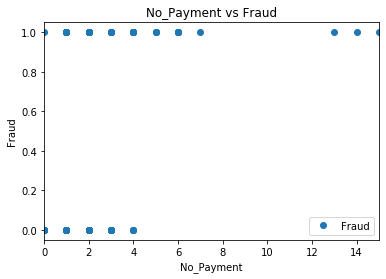

In [154]:
dataset.plot(x='No_Payments', y='Fraud', style='o')  
plt.title('No_Payment vs Fraud')  
plt.xlabel('No_Payment')  
plt.ylabel('Fraud')  
plt.show()

We can see that customers who have payment methods higher than 4 are likely to be fraudluent

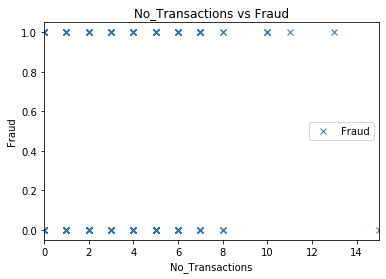

In [156]:
dataset.plot(x='No_Transactions', y='Fraud', style='x')  
plt.title('No_Transactions vs Fraud')  
plt.xlabel('No_Transactions')  
plt.ylabel('Fraud')  
plt.show()

We can see that customers whose number of transactions are higher than 8 are likely to be fraudluent

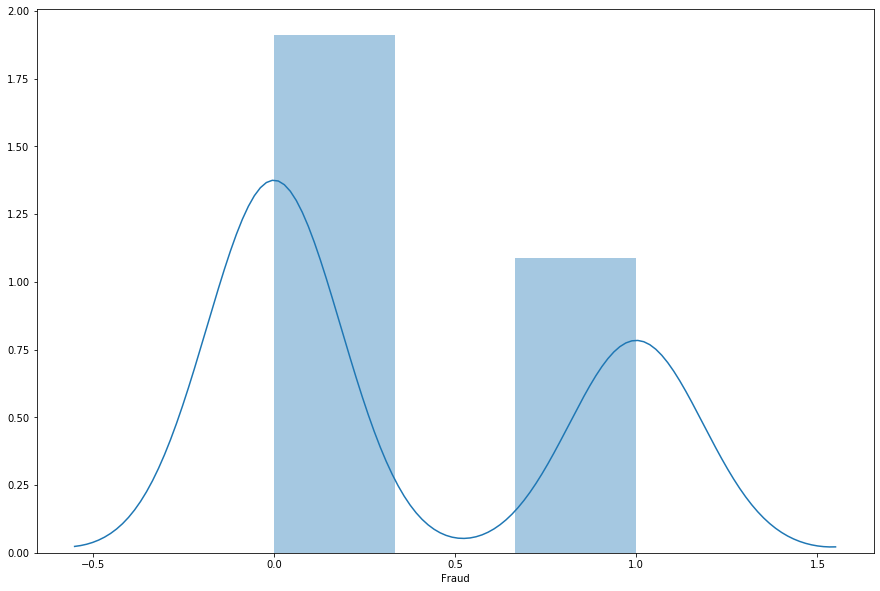

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Fraud'])

In [10]:
X = dataset['Fraud'].values.reshape(-1,1)
y = dataset['No_Payments'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[1.48809524]
[[1.61190476]]


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4,3.100000
1,2,1.488095
2,1,1.488095
3,6,3.100000
4,3,1.488095
5,1,1.488095
6,2,3.100000
7,2,3.100000
8,1,1.488095
9,3,1.488095


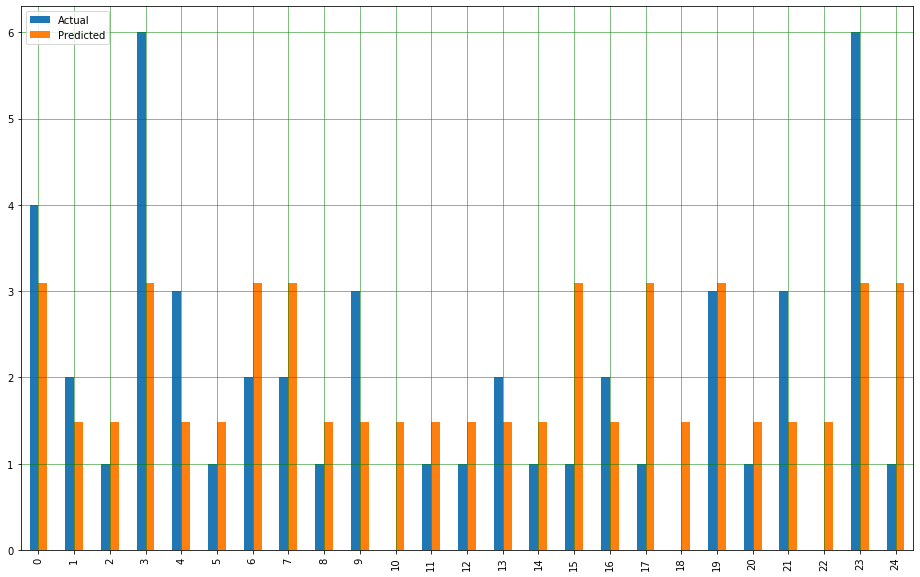

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

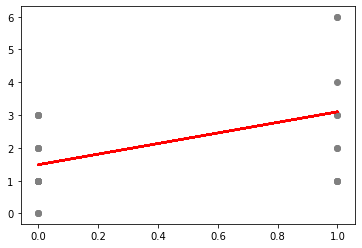

In [17]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.056372549019608
Mean Squared Error: 1.6883451714018942
Root Mean Squared Error: 1.2993633715792878


In [161]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7134146341463414


<h3>logistic regression 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


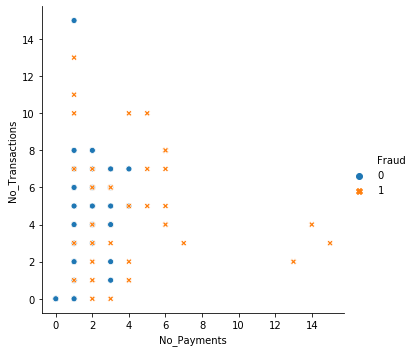

In [23]:
sns.relplot(x="No_Payments", y="No_Transactions", hue="Fraud", style="Fraud",
            data=dataset)

From the above graph we can say that number of payments which are greater than 4 are fraud
the customers whose number of transactions are above 8 are considered as fraud 
about 7 out of 9 customers whose no of payments are 2 farud

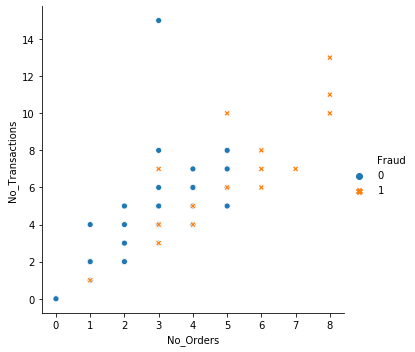

In [25]:
sns.relplot(x="No_Orders", y="No_Transactions", hue="Fraud", style="Fraud",
            data=dataset)

from the above graph we can see that the customers whose number of orders is geater than 5 are fraud


# Below I am trying to merge both datasets according to customer emails

In [190]:
df1=pd.read_csv('C:/Users/Rasheed/Downloads/Customer_DF.csv')
df2=pd.read_csv('C:/Users/Rasheed/Downloads/cust_transaction_details.csv')
df3=df1.merge(df2,on='customerEmail')

In [27]:
df3.head()

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [29]:
df3.shape

(819, 20)

In [30]:
df3.tail()


,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
814,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,618,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
815,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,619,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
816,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,620,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
817,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,621,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled
818,167,dawn05@tucker-brown.com,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,0,622,wgmajf82,5lmvrj,f0xnu5om9,0,card,JCB 16 digit,27,0,fulfilled


In [31]:
df3

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,0,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,1,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,2,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,3,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,4,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
5,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,5,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed
6,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,6,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled
7,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,7,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled
8,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,8,pegqc4ud,itnk8y,dluy3jka0,0,card,Discover,25,1,fulfilled
9,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,9,uo3slwh7,itnk8y,8pneoi03z,0,card,JCB 16 digit,25,0,fulfilled


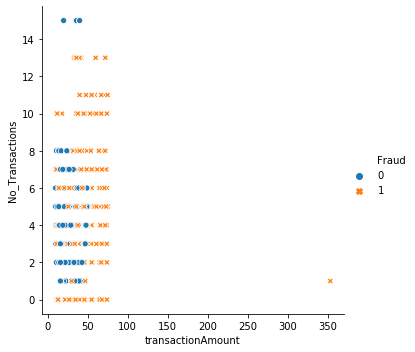

In [32]:
sns.relplot(x="transactionAmount", y="No_Transactions", hue="Fraud", style="Fraud",
            data=df3)

From the above graph we can say that the customers whose transaction amounts are greater than 50 are fraud
and whose number of transactions at extremes(0 or more than 8) are fraud

In [41]:
df3.isna().sum()                                   

Unnamed: 0_x                        0
customerEmail                       0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
Unnamed: 0_y                        0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
dtype: int64

In above cell I am checking if any value is null

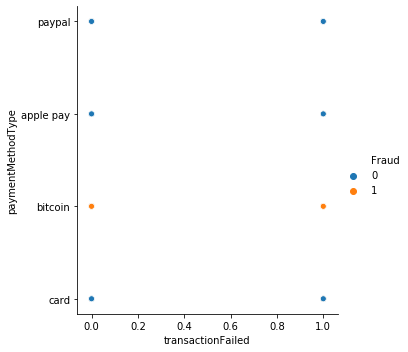

In [63]:
sns.relplot(x='transactionFailed', y='paymentMethodType',hue='Fraud', data=df3)  


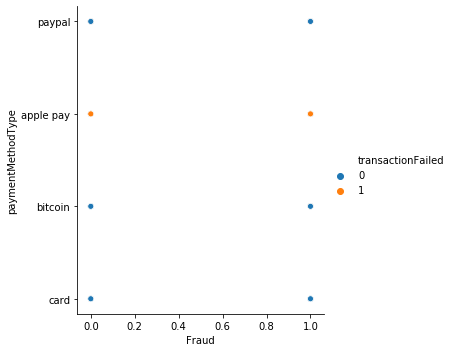

In [64]:
sns.relplot(x='Fraud', y='paymentMethodType',hue='transactionFailed', data=df3)  

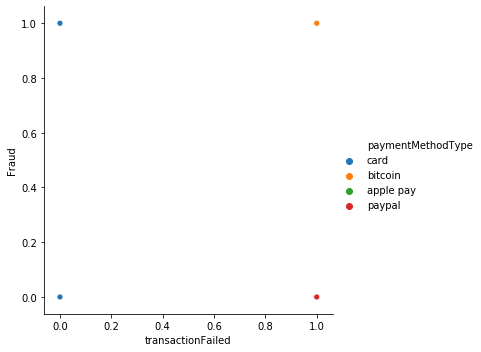

In [166]:
sns.relplot(x='transactionFailed', y='Fraud',hue='paymentMethodType', data=df3)  

In [67]:
df3['transactionFailed'].value_counts()

0    609
1    210
Name: transactionFailed, dtype: int64

In [68]:
df3.describe()

,Unnamed: 0_x,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,85.655678,5.195360,3.808303,2.135531,0.553114,310.683761,0.100122,35.147741,0.256410
std,50.682492,2.924214,1.866872,1.860001,0.497475,190.195560,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,45.000000,3.000000,3.000000,1.000000,0.000000,153.000000,0.000000,22.000000,0.000000
50%,80.000000,5.000000,4.000000,2.000000,1.000000,284.000000,0.000000,34.000000,0.000000
75%,133.000000,7.000000,5.000000,3.000000,1.000000,487.500000,0.000000,46.000000,1.000000
max,167.000000,15.000000,8.000000,15.000000,1.000000,622.000000,1.000000,353.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236288E3F28>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

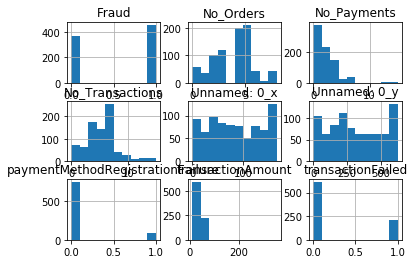

In [69]:
plt.figure(figsize=(20,10))
df3.hist()

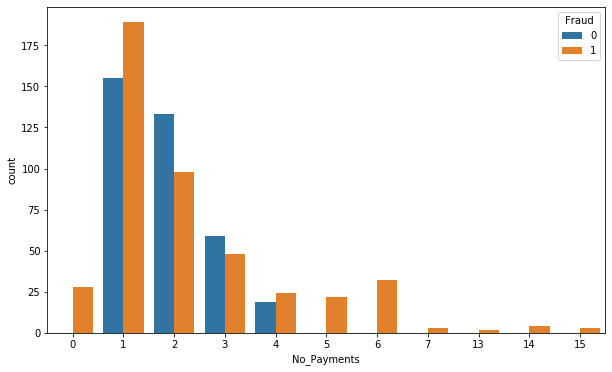

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x='No_Payments',hue='Fraud',data=df3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

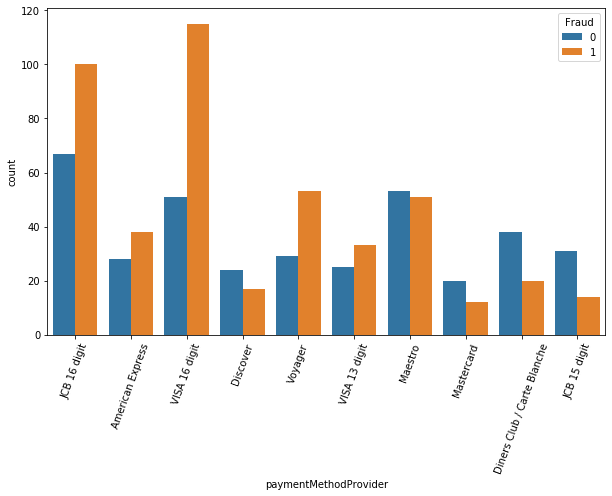

In [126]:
plt.figure(figsize=(10,6))
sns.countplot(x='paymentMethodProvider',hue = 'Fraud' ,data=df3)
plt.xticks(rotation = 70)

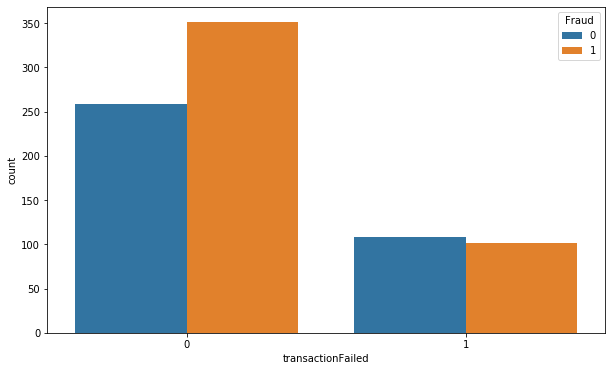

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='transactionFailed',hue='Fraud',data=df3)

From the above graph we can see that successful transactions are more likely to be fraud while in the failed transactions the fraudlent numbers are similar to non fraudluent

,Unnamed: 0_x,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
Unnamed: 0_x,1.000000,0.091568,0.078361,0.071418,0.096874,0.658483,0.034793,0.003194,-0.014337
No_Transactions,0.091568,1.000000,0.776311,0.135827,-0.062605,0.096915,0.134989,0.073317,0.192300
No_Orders,0.078361,0.776311,1.000000,0.295126,0.107726,0.057444,0.147646,0.180719,-0.001114
No_Payments,0.071418,0.135827,0.295126,1.000000,0.142165,0.040916,-0.022132,0.054568,-0.036797
Fraud,0.096874,-0.062605,0.107726,0.142165,1.000000,0.088908,-0.068362,0.279281,-0.079607
Unnamed: 0_y,0.658483,0.096915,0.057444,0.040916,0.088908,1.000000,0.037278,-0.100000,-0.085922
paymentMethodRegistrationFailure,0.034793,0.134989,0.147646,-0.022132,-0.068362,0.037278,1.000000,0.027747,0.009077
transactionAmount,0.003194,0.073317,0.180719,0.054568,0.279281,-0.100000,0.027747,1.000000,0.011821
transactionFailed,-0.014337,0.192300,-0.001114,-0.036797,-0.079607,-0.085922,0.009077,0.011821,1.000000


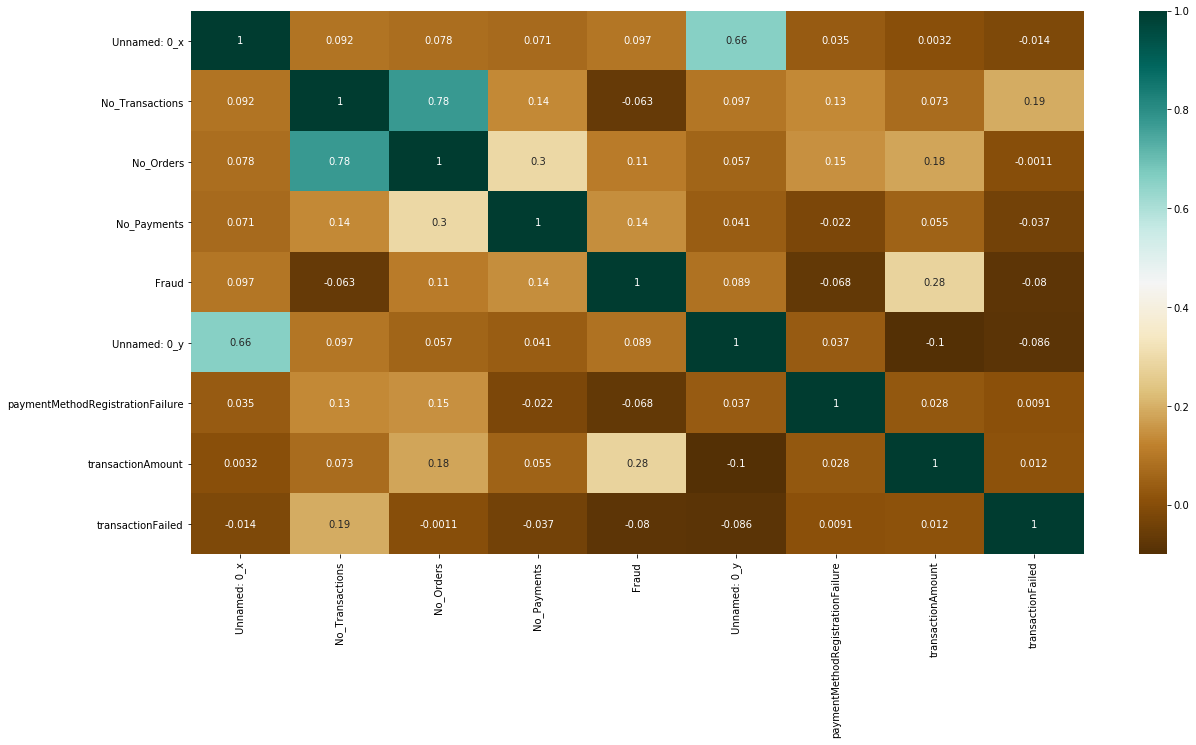

In [72]:
plt.figure(figsize=(20,10))
c= df3.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


# Implementing various Machine Learning algorithms

<h3>Linear Regression

In [74]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [75]:
df3.shape

(819, 20)

In [76]:
df3.describe()

,Unnamed: 0_x,No_Transactions,No_Orders,No_Payments,Fraud,Unnamed: 0_y,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,85.655678,5.195360,3.808303,2.135531,0.553114,310.683761,0.100122,35.147741,0.256410
std,50.682492,2.924214,1.866872,1.860001,0.497475,190.195560,0.300346,19.640072,0.436918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,45.000000,3.000000,3.000000,1.000000,0.000000,153.000000,0.000000,22.000000,0.000000
50%,80.000000,5.000000,4.000000,2.000000,1.000000,284.000000,0.000000,34.000000,0.000000
75%,133.000000,7.000000,5.000000,3.000000,1.000000,487.500000,0.000000,46.000000,1.000000
max,167.000000,15.000000,8.000000,15.000000,1.000000,622.000000,1.000000,353.000000,1.000000


In [77]:
df3.isnull().any()

Unnamed: 0_x                        False
customerEmail                       False
customerPhone                       False
customerDevice                      False
customerIPAddress                   False
customerBillingAddress              False
No_Transactions                     False
No_Orders                           False
No_Payments                         False
Fraud                               False
Unnamed: 0_y                        False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [79]:
X = df3[['transactionFailed', 'transactionAmount', 'paymentMethodRegistrationFailure', 'No_Payments', 'No_Orders', 'No_Transactions']].values
y = df3['Fraud'].values

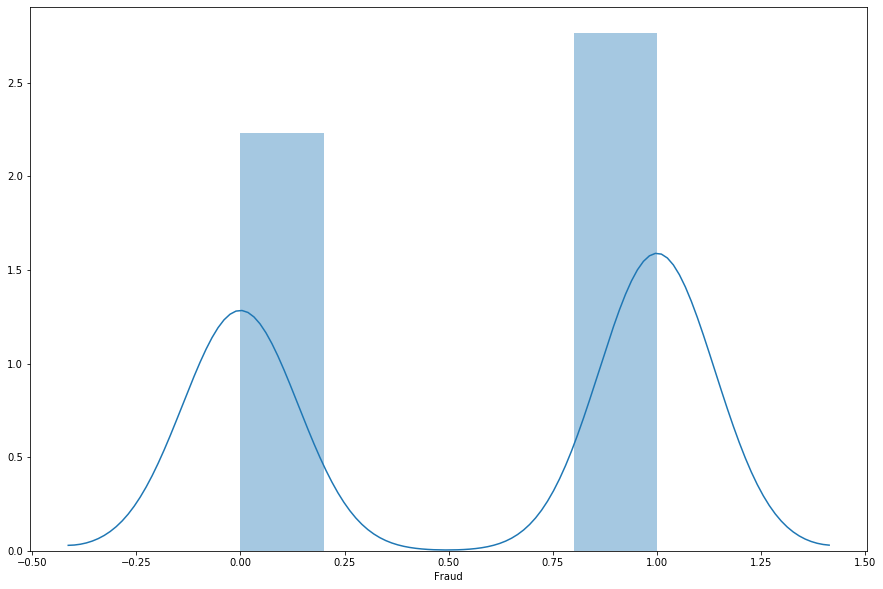

In [80]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df3['Fraud'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [84]:
y_pred = regressor.predict(X_test)

In [85]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df5 = df4.head(25)

In [86]:
df5

,Actual,Predicted
0,1,0.941590
1,1,0.263246
2,0,0.415591
3,0,0.447836
4,1,0.548756
5,1,1.030313
6,1,0.935770
7,0,0.529739
8,1,0.556676
9,1,0.398447


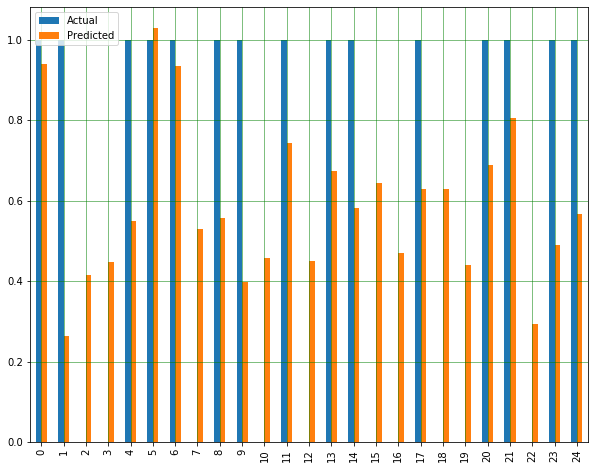

In [87]:
df5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42564405896190594
Mean Squared Error: 0.23225731536233984
Root Mean Squared Error: 0.4819308201000843


In [89]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

<h3>Logistic Regression 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

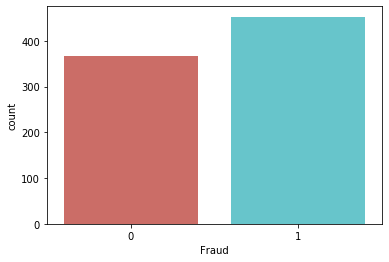

In [91]:
df3.Fraud.value_counts()
sns.countplot(x = 'Fraud', data = df3, palette = 'hls')
plt.show()

In [92]:
X = df3[['transactionFailed', 'transactionAmount', 'paymentMethodRegistrationFailure', 'No_Payments', 'No_Orders', 'No_Transactions']].values
y = df3['Fraud'].values

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [94]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
y_pred=logreg.predict(X_test)

In [96]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47, 32],
       [17, 68]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

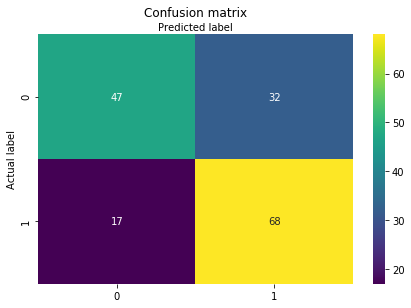

In [107]:
class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7012195121951219
Precision: 0.68
Recall: 0.8


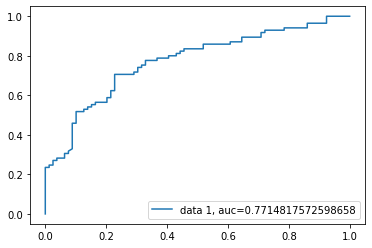

In [99]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

the above area under curvr value(auc) is 0.77 which means the model is moderate classifier

In [100]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[47, 32],
       [17, 68]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

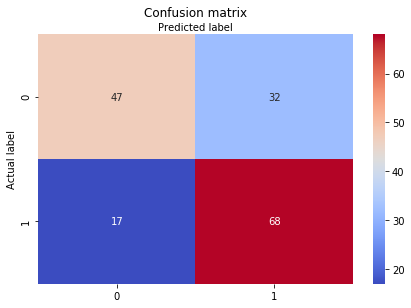

In [101]:
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [102]:
68+47-(32+17)

66

In [157]:
import re
from re import search

def valid_email(email):
    if bool(re.search(r"^[\w\.\+\-]+\@[\w\-]+\.[a-z]{2,4}$", email)):
        return 1
    else:
        return 0


In [191]:
df3['Valid_Email'] = df3['customerEmail'].apply(lambda x: valid_email(x))
df3.Valid_Email,df3.customerEmail
df3

,Unnamed: 0_x,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,...,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Valid_Email
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,...,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,1
1,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0,...,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,1
2,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,...,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1
3,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,...,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1
4,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1,...,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1
5,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,q3lyvbza,yk34y2,8pneoi03z,0,card,JCB 16 digit,33,0,failed,1
6,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,3alf9irw,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,1,fulfilled,1
7,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,69w9wymx,28v6b0,8pneoi03z,0,card,JCB 16 digit,24,0,fulfilled,1
8,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,pegqc4ud,itnk8y,dluy3jka0,0,card,Discover,25,1,fulfilled,1
9,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,0,...,uo3slwh7,itnk8y,8pneoi03z,0,card,JCB 16 digit,25,0,fulfilled,1


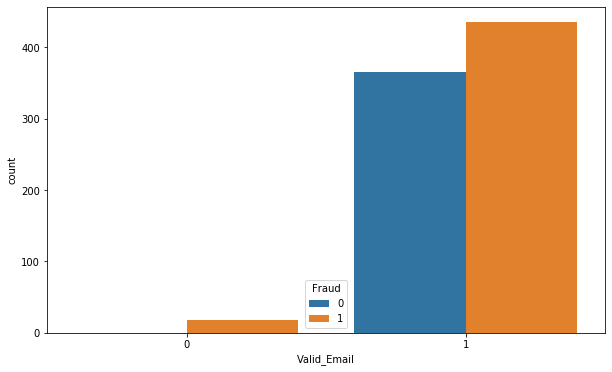

In [160]:
plt.figure(figsize=(10,6))
sns.countplot(x='Valid_Email',hue='Fraud',data=df3)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

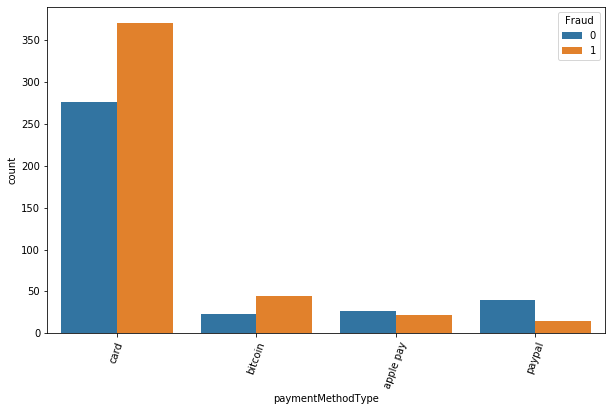

In [150]:
plt.figure(figsize=(10,6))
sns.countplot(x='paymentMethodType',hue = 'Fraud' ,data=df3)
plt.xticks(rotation = 70)

out of 4 transactions paypal seems to be less fraudluent than others 
most used mode of transactions is card

<h3>Random Forest

In [172]:
# import modules
import pandas as pd
import numpy as np
import subprocess

ncol = len(df3.axes[1])
nrow=len(df3.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df3.dtypes) #check data types

# count freq
#df3.groupby('y').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df3.iloc[:,i].dtype==object):
        A= df3.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df3.iloc[:,i] = df3.iloc[:,i].replace(map_to_int)
print (df3.dtypes)


#first n-1 col as features, and the last one as target
df8=df3.iloc[:,0:n]
features = list(df8.columns[:(n-1)])
print("* features:", features, sep="\n")
df8.rename(columns={'y':'Fraud'}, inplace=True)
#list(df1)
#df1

y = df8["Fraud"]
X = df8[features]

819 x 21
Unnamed: 0_x                        int64
customerEmail                       int64
customerPhone                       int64
customerDevice                      int64
customerIPAddress                   int64
customerBillingAddress              int64
No_Transactions                     int64
No_Orders                           int64
No_Payments                         int64
Fraud                               int64
Unnamed: 0_y                        int64
transactionId                       int64
orderId                             int64
paymentMethodId                     int64
paymentMethodRegistrationFailure    int64
paymentMethodType                   int64
paymentMethodProvider               int64
transactionAmount                   int64
transactionFailed                   int64
orderState                          int64
Valid_Email                         int64
dtype: object
Unnamed: 0_x                        int64
customerEmail                       int64
customerPho

--------------- Correlation Matrix ---------------


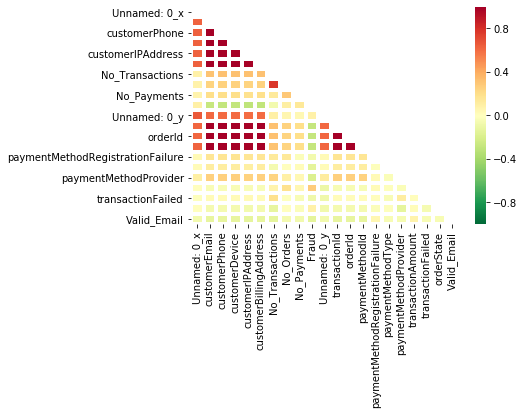

In [176]:
# a quick check the correlation
corr_df = df8.corr()

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
print("--------------- Correlation Matrix ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1 ,mask = mask,  linewidths=3,fmt='.1f')
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0,fontsize=10) 
plt.xticks(rotation=90,fontsize=10) 
plt.show()

<h3>Descision Tree

In [180]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.9786259541984733
The test accuracy is 0.8658536585365854


In [185]:
print("Accuracy:",accuracy_score(y_test, y_test_pred))

Accuracy: 0.8658536585365854


In [189]:
dd = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dd

,Actual,Predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,1,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,0


According to accuracy descision tree best suits for this dataset

<h2> Conclusion

from the above analysis we can conclude that
    * customers who have payment methods higher than 4 are likely to be fraudluent
    * customers whose number of transactions are higher than 8 are likely to be fraudluent
    * number of payments which are greater than 4 are fraud the customers whose number of transactions are above 8 are         considered as fraud about 7 out of 9 customers whose no of payments are 2 farud
    * the customers whose number of orders is geater than 5 are fraud
    * the customers whose transaction amounts are greater than 50 are fraud and whose number of transactions at extremes(0 or    more than 8) are fraud
    * successful transactions are more likely to be fraud while in the failed transactions the fraudlent numbers are similar to non fraudluent
    * out of 4 (card, bitcoin, apple pay, paypal) transactions paypal seems to be less fraudluent than others most used mode of transactions is card

accuracy of each algorithms used
    * linear regression : 71%
    * logistic regression : 77%
    * descision tree : 86.5%

Best suited algorithm is : descision tree


# Major Project done by Mohammed Shoaib Uddin email:mohdshoaibuddin61@gmail.com
